## 0.0 Initialization 

In [1]:
iterations = 10000

### 0.1 Import Libraries

In [2]:
import os

import sys
import time

import init_load_board as ib 
import init_simple_mdp as imdp

import function_board as fb 
import function_tool as ft

import pandas as pd

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=300)
np.set_printoptions(threshold=300)

import torch
torch.set_printoptions(precision=4)
torch.set_printoptions(linewidth=300)
torch.set_printoptions(threshold=300)

import helpers as h 

#%%
data_parameter_dir = fb.data_parameter_dir
result_dir = './result'  

#os.chdir('darts-thesis')

import simulator 

import math

import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import cm, colors

def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

import statistics


### 0.2 Initialize Expected Results Dataframe for Individual Players

In [3]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','remaining_throws','score_gained','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

### 0.3 Initialize Simulators for Different $\epsilon$ 

In [4]:
# Initialize Simulators 

player_num = 10
epsilon_list = [1,2,3,4,5,6,7,8,9]

sim_list = []


for epsilon in epsilon_list:
    
    sim_list.append(simulator.Simulator(player_num=player_num,epsilon=epsilon))


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl


/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:693: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: divide by zero encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:731: RuntimeWarning: overflow encountered in divide
  num_tothrow = num_tothrow / prob_otherstate
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: divide by zero encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_notbust_dic_nt[score_max]
/Users/rachael/Desktop/darts-thesis/helpers.py:1163: RuntimeWarning: overflow encountered in divide
  num_turns_array[:,score_gained_index] = num_turns_array[:,score_gained_index] / prob_no

solve dp_turn_policyiter in 27.049731016159058 seconds
[[0.     0.     1.8856 ... 5.5944 5.5758 5.6116]
 [0.     0.     1.     ... 4.9685 4.9631 4.9765]
 [0.     0.     1.     ... 4.7444 4.7403 4.7516]
 ...
 [0.     0.     1.     ... 3.8072 3.8026 3.783 ]
 [0.     0.     1.     ... 3.5561 3.5447 3.4989]
 [0.     0.     1.     ... 3.     3.     3.    ]]
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
solve dp_turn_policyiter in 25.03824210166931 seconds
[[0.     0.     2.5371 ... 7.405  7.4122 7.4278]
 [0.     0.     1.     ... 6.267  6.2766 6.2897]
 [0.     0.     1.     ... 5.8664 5.8755 5.8889]
 ...
 [0.     0.     1.     ... 3.9977 3.9967 4.0008]
 [0.     0.     1.     ... 3.7246 3.6864 3.6893]
 [0.     0.     1.     ... 3.     3.     3.    ]]
load_pickle from ./data_parameter/player_gaussin_fit/gr

## 1.0 Baseline - No Handicaps  

In [39]:
# Initialize Parameters 

# iterations = 100

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 4.553s.
Ran in 4.523s.
Ran in 4.512s.
Ran in 6.005s.
Ran in 4.504s.
Ran in 7.250s.
Ran in 4.513s.
Ran in 8.299s.
Ran in 4.527s.
Ran in 9.071s.
Ran in 4.504s.
Ran in 9.819s.
Ran in 4.509s.
Ran in 10.552s.
Ran in 4.473s.
Ran in 11.092s.
Ran in 4.752s.
Ran in 11.621s.
Ran in 5.984s.
Ran in 6.046s.
Ran in 5.977s.
Ran in 7.238s.
Ran in 5.975s.
Ran in 8.214s.
Ran in 5.947s.
Ran in 9.057s.
Ran in 6.035s.
Ran in 9.738s.
Ran in 5.936s.
Ran in 10.419s.
Ran in 5.967s.
Ran in 10.999s.
Ran in 5.934s.
Ran in 11.573s.
Ran in 7.203s.
Ran in 7.144s.
Ran in 7.197s.
Ran in 8.150s.
Ran in 7.152s.
Ran in 8.967s.
Ran in 7.190s.
Ran in 9.775s.
Ran in 6.997s.
Ran in 10.345s.
Ran in 7.135s.
Ran in 10.830s.
Ran in 7.158s.
Ran in 11.488s.
Ran in 8.028s.
Ran in 8.100s.
Ran in 8.157s.
Ran in 8.890s.
Ran in 8.122s.
Ran in 9.602s.
Ran in 8.128s.
Ran in 10.334s.
Ran in 8.104s.
Ran in 10.888s.
Ran in 8.116s.
Ran in 11.413s.
Ran in 8.991s.
Ran in 8.891s.
Ran in 8.926s.
Ran in 9.782s.
Ran in 9.118s.
Ran in 10.412

In [40]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_baseline_results = pd.DataFrame(data=outcomes,columns=col_names)

df_baseline_results = df_baseline_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_baseline_results = df_baseline_results.round(2)

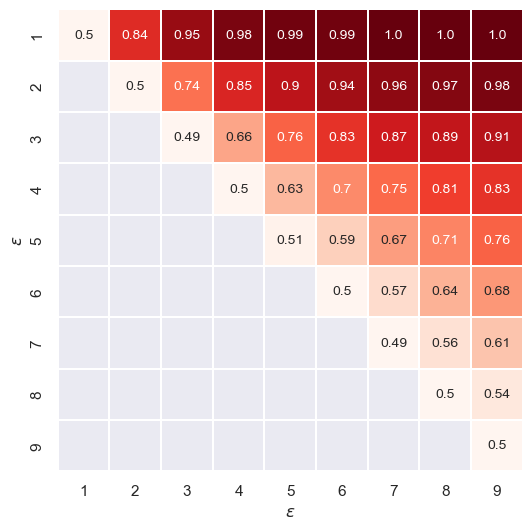

In [79]:
df_baseline_results_graph = df_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

## 2.0 Baseline - Spot Point Heuristic

### 2.1 Extract Spot Point Heuristic Handicap

In [71]:
expected_turns_list = []
for epsilon in epsilon_list: 
    t = df.loc[(df.score==501) & (df.epsilon==epsilon) & (df.tokens==0) & (df.remaining_throws==3)].optimal_value.values[0]
    expected_turns_list.append(t)

ppd_list = [501 / (expected_turns_list[i]*3) for i in range(len(expected_turns_list))]


In [72]:
ssl_list = []

for i in range(len(ppd_list)):

    for j in range(i,len(ppd_list)):

        hppd = ppd_list[i]
        lppd = ppd_list[j]

        ssl = round(501*(lppd/hppd))

        ssl_list.append([epsilon_list[i],epsilon_list[j],ssl])

#ssl_list

ssl_list_full = []

for ssl in ssl_list: 

    th1 = df.loc[(df.score==501) & (df.epsilon==ssl[0]) & (df.tokens==0)].optimal_value.values[0] * 3
    th2 = df.loc[(df.score==ssl[2]) & (df.epsilon==ssl[1]) & (df.tokens==0)].optimal_value.values[0] * 3

    ssl_list_full.append([ssl[0],ssl[1],ssl[2],th1,th2, th2-th1])

spot_point_df = pd.DataFrame(ssl_list_full,columns=['p1_epsilon','p2_epsilon','p2_starting_score','p1_expected_throws','p2_expected_throws','diff_expected_throws'])
spot_point_df.head()

,p1_epsilon,p2_epsilon,p2_starting_score,p1_expected_throws,p2_expected_throws,diff_expected_throws
0,1,1,501,18.830183,18.830183,0.000000
1,1,2,378,18.830183,19.818359,0.988176
2,1,3,314,18.830183,20.773527,1.943344
3,1,4,275,18.830183,21.716732,2.886549
4,1,5,248,18.830183,22.704227,3.874044


In [44]:
# epsilon1 = 1 
# epsilon0 = 2

# start_score_handicap = spot_point_df.loc[(spot_point_df.p1_epsilon == epsilon1) & (spot_point_df.p2_epsilon == epsilon0)]['p2_starting_score'].values
# spot_points0 = starting_score - start_score_handicap[0]
# spot_points0

### 2.2 Run Simulation

In [45]:
## Run Simulation 

# Initialize Parameters 

# iterations = 100

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp_baseline = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            start_score_handicap = spot_point_df.loc[(spot_point_df.p1_epsilon == epsilon1) & (spot_point_df.p2_epsilon == epsilon0)]['p2_starting_score'].values
            spot_points0 = starting_score - start_score_handicap[0]

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                # turns1 = math.ceil((len(sim1_paths[iter]) - 1) / 3)
                # turns0 = math.ceil((len(sim0_paths[iter]) - 1) / 3)
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp_baseline.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 4.509s.
Ran in 4.479s.
Ran in 4.573s.
Ran in 4.727s.
Ran in 4.430s.
Ran in 4.944s.
Ran in 4.464s.
Ran in 5.118s.
Ran in 4.425s.
Ran in 5.290s.
Ran in 4.423s.
Ran in 5.447s.
Ran in 4.454s.
Ran in 5.757s.
Ran in 4.457s.
Ran in 5.969s.
Ran in 4.377s.
Ran in 6.067s.
Ran in 5.940s.
Ran in 5.907s.
Ran in 5.830s.
Ran in 6.154s.
Ran in 5.903s.
Ran in 6.293s.
Ran in 5.905s.
Ran in 6.541s.
Ran in 5.856s.
Ran in 6.644s.
Ran in 5.863s.
Ran in 6.788s.
Ran in 5.835s.
Ran in 6.984s.
Ran in 5.905s.
Ran in 7.285s.
Ran in 7.101s.
Ran in 7.101s.
Ran in 7.160s.
Ran in 7.372s.
Ran in 7.124s.
Ran in 7.529s.
Ran in 7.163s.
Ran in 7.695s.
Ran in 7.151s.
Ran in 7.795s.
Ran in 7.095s.
Ran in 7.996s.
Ran in 7.155s.
Ran in 8.053s.
Ran in 8.033s.
Ran in 8.149s.
Ran in 8.126s.
Ran in 8.366s.
Ran in 8.090s.
Ran in 8.382s.
Ran in 8.031s.
Ran in 8.472s.
Ran in 8.040s.
Ran in 8.747s.
Ran in 8.029s.
Ran in 8.794s.
Ran in 8.882s.
Ran in 9.073s.
Ran in 8.923s.
Ran in 9.107s.
Ran in 8.908s.
Ran in 9.313s.
Ran in 8.9

In [46]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_baseline_results = pd.DataFrame(data=outcomes_sp_baseline,columns=col_names)

df_sp_baseline_results = df_sp_baseline_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_baseline_results = df_sp_baseline_results.round(2)


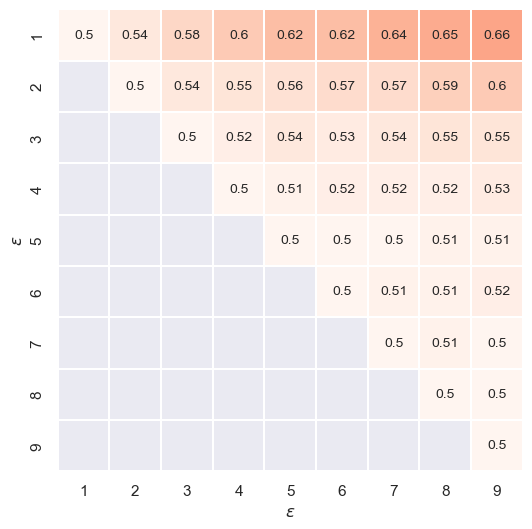

In [78]:
df_sp_baseline_results_graph = df_sp_baseline_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_baseline_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

In [92]:
sim_paths = []
iterations = 1000

for epsilon in epsilon_list:

    start_score_handicap = spot_point_df.loc[(spot_point_df.p1_epsilon == 1) & (spot_point_df.p2_epsilon == epsilon)]['p2_starting_score'].values
    spot_points = starting_score - start_score_handicap[0].round()

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    sim_paths.append(sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points))



Ran in 0.477s.
Ran in 0.523s.
Ran in 0.523s.
Ran in 0.524s.
Ran in 0.681s.
Ran in 0.649s.
Ran in 0.903s.
Ran in 0.636s.
Ran in 0.649s.


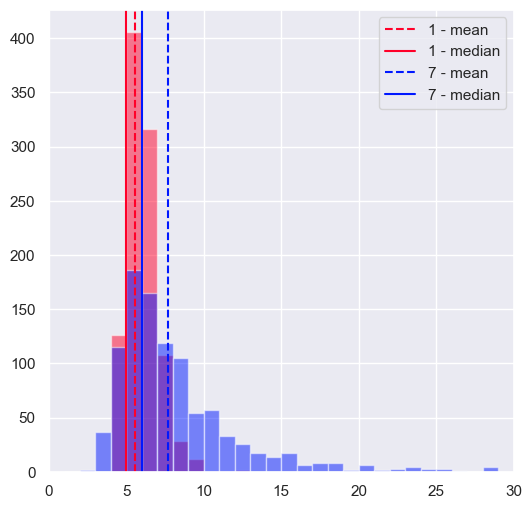

In [94]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [1,7]:
        # plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        # #sns.kdeplot(np.array(data),color=color)
        # plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['1 - mean','1 - median','7 - mean','7 - median'])


#plt.legend([1,7])

In [110]:
sim_paths = []
iterations = 1000

epsilon_list2 = [4,5,5,7,8,9]

for epsilon in epsilon_list2:

    start_score_handicap = spot_point_df.loc[(spot_point_df.p1_epsilon == 4) & (spot_point_df.p2_epsilon == epsilon)]['p2_starting_score'].values
    spot_points = starting_score - start_score_handicap[0].round()

    i = epsilon_list2.index(epsilon)
    sim = sim_list[i]
    sim_paths.append(sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points))



Ran in 0.470s.
Ran in 0.581s.
Ran in 0.580s.
Ran in 0.723s.
Ran in 0.717s.
Ran in 0.756s.


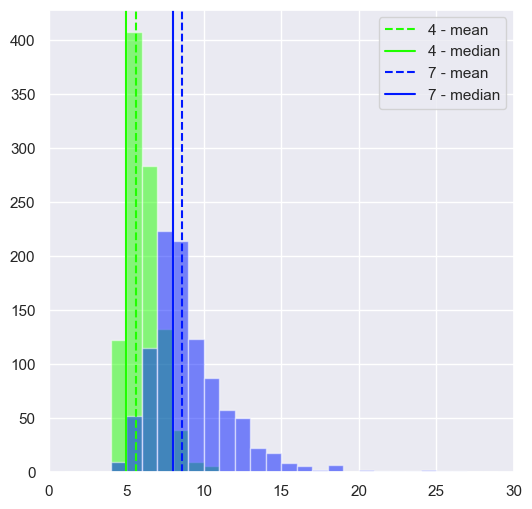

In [111]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list2:

    i = epsilon_list2.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [4,7]:
        # plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        # #sns.kdeplot(np.array(data),color=color)
        # plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['4 - mean','4 - median','7 - mean','7 - median'])


#plt.legend([1,7])

## 3.0 Optimal Credits 

### 3.1 Extract Optimal Credit Handicap

In [28]:
def linear_interpolation(x1,x2,y1,y2,y):
    x = x1 - ((y1-y)/(y1-y2))*(x1-x2)
    return x 

In [29]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','remaining_throws','score_gained','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

# Get dataframe only for score values at 501 
df_501 = df.loc[df.score==501]
df_501 = df_501.loc[df_501.remaining_throws==3]
#df_501 = df_501.loc[df_501.epsilon <= 10]

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df_501.loc[df_501.epsilon==epsilon].set_index('tokens')['optimal_value'].copy()
    epsilon_dfs.append(temp)





In [30]:
handicap_vals = {}

for i in range(len(epsilon_list)):

    handicap_vals[epsilon_list[i]] = {}

for i in range(len(epsilon_list)):

    stronger_no_token = epsilon_dfs[i][0]

    for j in range(len(epsilon_list)):

        if epsilon_list[i] <= epsilon_list[j]: 

            df_j = epsilon_dfs[j]

            for b in range(1,len(df_j)):

                x1 = b-1
                x2 = b 
                y1 = df_j[b-1]
                y2 = df_j[b]

                if (stronger_no_token <= y1) & (stronger_no_token >= y2):

                    handicap = linear_interpolation(x1,x2,y1,y2,stronger_no_token)

                    handicap_vals[epsilon_list[i]][epsilon_list[j]] = handicap


In [51]:
handicap_vals

{1: {1: 0.0,
  2: 2.7073494862260956,
  3: 4.201149371057769,
  4: 4.901838605197209,
  5: 5.315034552065043,
  6: 5.585031367281114,
  7: 5.773882868818306,
  8: 5.913716470664951,
  9: 6.022716603068476},
 2: {2: 0.0,
  3: 0.9466195098164703,
  4: 2.041244128512719,
  5: 2.7773805332966854,
  6: 3.260072493446635,
  7: 3.5974329284617936,
  8: 3.845434053238502,
  9: 4.035604150218655},
 3: {3: 0.0,
  4: 0.5986409369704185,
  5: 0.9152214013370987,
  6: 1.3415201228434197,
  7: 1.7739684901180843,
  8: 2.094022860360418,
  9: 2.352084579404067},
 4: {4: 0.0,
  5: 0.42797807085626327,
  6: 0.6834918141050115,
  7: 0.8427297246834026,
  8: 0.9455734563723788,
  9: 1.063288904760061},
 5: {5: 0.0,
  6: 0.3235909859418567,
  7: 0.5325430814963956,
  8: 0.6730919651101189,
  9: 0.7709976121211111},
 6: {6: 0.0,
  7: 0.2536506927037366,
  8: 0.42810071332980737,
  9: 0.5525922088736522},
 7: {7: 0.0, 8: 0.2052828695390583, 9: 0.3539540098758922},
 8: {8: 0.0, 9: 0.17094793281940268},
 9: {

### 3.2 Floor Simulation

In [32]:
## Run Simulation 

# Initialize Parameters 

#iterations = 1000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_beta_floor = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            tokens0 = handicap_vals[epsilon1][epsilon0]
            tokens0 = math.floor(tokens0)

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_beta_floor.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.535s.
Ran in 0.471s.
Ran in 0.461s.
Ran in 0.503s.
Ran in 0.489s.
Ran in 0.534s.
Ran in 0.484s.
Ran in 0.575s.
Ran in 0.463s.
Ran in 0.504s.
Ran in 0.455s.
Ran in 0.544s.
Ran in 0.483s.
Ran in 0.578s.
Ran in 0.465s.
Ran in 0.570s.
Ran in 0.502s.
Ran in 0.559s.
Ran in 0.627s.
Ran in 0.620s.
Ran in 0.621s.
Ran in 0.759s.
Ran in 0.606s.
Ran in 0.648s.
Ran in 0.647s.
Ran in 0.705s.
Ran in 0.596s.
Ran in 0.644s.
Ran in 0.603s.
Ran in 0.694s.
Ran in 0.606s.
Ran in 0.694s.
Ran in 0.595s.
Ran in 0.634s.
Ran in 0.716s.
Ran in 0.751s.
Ran in 0.741s.
Ran in 0.848s.
Ran in 0.960s.
Ran in 0.921s.
Ran in 0.766s.
Ran in 0.817s.
Ran in 0.786s.
Ran in 0.891s.
Ran in 0.774s.
Ran in 0.785s.
Ran in 0.745s.
Ran in 0.836s.
Ran in 0.818s.
Ran in 0.849s.
Ran in 0.832s.
Ran in 0.918s.
Ran in 0.843s.
Ran in 1.010s.
Ran in 0.843s.
Ran in 1.064s.
Ran in 0.877s.
Ran in 1.142s.
Ran in 0.833s.
Ran in 0.879s.
Ran in 0.947s.
Ran in 0.937s.
Ran in 0.941s.
Ran in 1.016s.
Ran in 0.952s.
Ran in 1.115s.
Ran in 0.9

In [33]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_beta_floor_results = pd.DataFrame(data=outcomes_beta_floor,columns=col_names)

df_beta_floor_results = df_beta_floor_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_beta_floor_results = df_beta_floor_results.round(2)


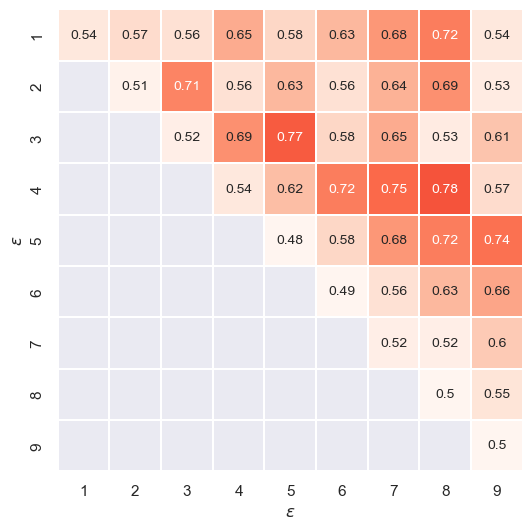

In [34]:
df_beta_floor_results_graph = df_beta_floor_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_beta_floor_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

### 3.3 Expectation Simulation

In [35]:
## Run Simulation 

# Initialize Parameters 

iterations = 1000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_beta_exp = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            tokens0 = handicap_vals[epsilon1][epsilon0]
            tokens0_lower = math.floor(tokens0)
            tokens0_higher = math.ceil(tokens0)
            threshold_higher = iterations * (tokens0-tokens0_lower)
            threshold_higher = int(threshold_higher.round())

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            # Run a portion of simulations with credits rounded up 
            sim0_paths = sim0.run_simulation(threshold_higher, starting_score=starting_score, starting_credits=tokens0_higher, spot_darts=spot_darts0, spot_points=spot_points0)
            # Run a portion of simulations with credits rounded down
            sim0_paths.extend(sim0.run_simulation(iterations - threshold_higher, starting_score=starting_score, starting_credits=tokens0_lower, spot_darts=spot_darts0, spot_points=spot_points0))

            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_beta_exp.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.460s.
Ran in 0.000s.
Ran in 0.460s.
Ran in 0.453s.
Ran in 0.338s.
Ran in 0.147s.
Ran in 0.452s.
Ran in 0.090s.
Ran in 0.399s.
Ran in 0.458s.
Ran in 0.437s.
Ran in 0.055s.
Ran in 0.463s.
Ran in 0.137s.
Ran in 0.354s.
Ran in 0.460s.
Ran in 0.264s.
Ran in 0.214s.
Ran in 0.508s.
Ran in 0.362s.
Ran in 0.121s.
Ran in 0.449s.
Ran in 0.443s.
Ran in 0.047s.
Ran in 0.457s.
Ran in 0.010s.
Ran in 0.463s.
Ran in 0.596s.
Ran in 0.000s.
Ran in 0.597s.
Ran in 0.598s.
Ran in 0.572s.
Ran in 0.038s.
Ran in 0.686s.
Ran in 0.024s.
Ran in 0.612s.
Ran in 0.595s.
Ran in 0.474s.
Ran in 0.156s.
Ran in 0.594s.
Ran in 0.151s.
Ran in 0.473s.
Ran in 0.605s.
Ran in 0.356s.
Ran in 0.270s.
Ran in 0.595s.
Ran in 0.513s.
Ran in 0.103s.
Ran in 0.585s.
Ran in 0.021s.
Ran in 0.595s.
Ran in 0.706s.
Ran in 0.000s.
Ran in 0.724s.
Ran in 0.713s.
Ran in 0.399s.
Ran in 0.331s.
Ran in 0.715s.
Ran in 0.663s.
Ran in 0.076s.
Ran in 0.709s.
Ran in 0.247s.
Ran in 0.503s.
Ran in 0.708s.
Ran in 0.564s.
Ran in 0.177s.
Ran in 0.7

In [36]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_beta_exp_results = pd.DataFrame(data=outcomes_beta_exp,columns=col_names)

df_beta_exp_results = df_beta_exp_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_beta_exp_results = df_beta_exp_results.round(2)


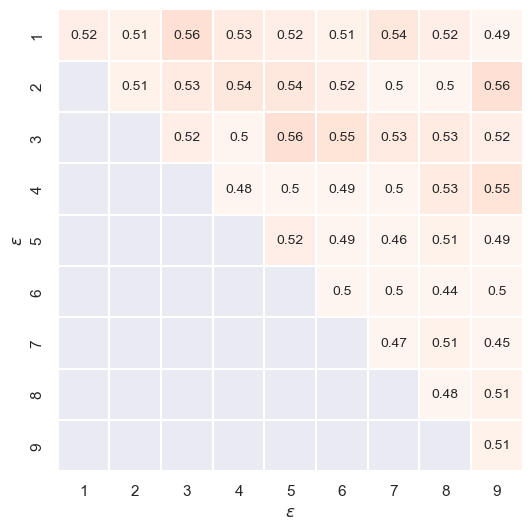

In [37]:
df_beta_exp_results_graph = df_beta_exp_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
#fig = sns.set(rc={'figure.figsize':(4,4)})
fig = sns.heatmap(df_beta_exp_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False,vmin=0.5,vmax=1)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')


In [96]:
sim_paths = []
iterations = 10000

for epsilon in epsilon_list:

    tokens0 = handicap_vals[1][epsilon]
    tokens0_lower = math.floor(tokens0)
    tokens0_higher = math.ceil(tokens0)
    threshold_higher = iterations * (tokens0-tokens0_lower)
    threshold_higher = int(threshold_higher.round())

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    # Run a portion of simulations with credits rounded up 
    simu_paths = sim.run_simulation(threshold_higher, starting_score=starting_score, starting_credits=tokens0_higher, spot_darts=0, spot_points=0)
    # Run a portion of simulations with credits rounded down
    simu_paths.extend(sim.run_simulation(iterations - threshold_higher, starting_score=starting_score, starting_credits=tokens0_lower, spot_darts=0, spot_points=0))

    sim_paths.append(simu_paths)

Ran in 0.000s.
Ran in 4.743s.
Ran in 3.360s.
Ran in 1.666s.
Ran in 0.907s.
Ran in 4.024s.
Ran in 4.187s.
Ran in 0.526s.
Ran in 1.379s.
Ran in 3.402s.
Ran in 2.693s.
Ran in 2.103s.
Ran in 3.582s.
Ran in 1.376s.
Ran in 4.298s.
Ran in 0.490s.
Ran in 0.092s.
Ran in 5.382s.


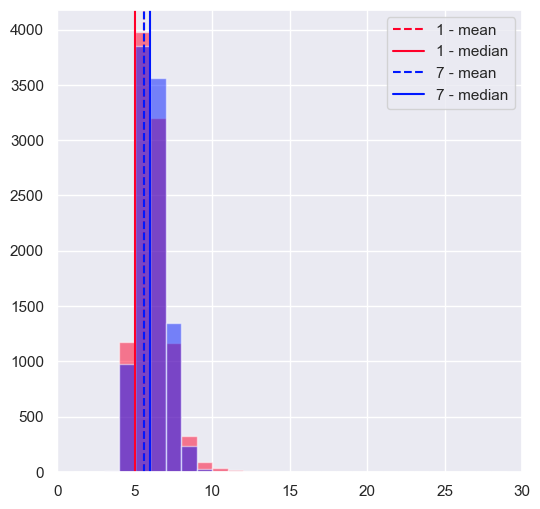

In [97]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [1,7]:
        # sns.kdeplot(np.array(data),color=color,alpha=0.5)
        # plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['1 - mean','1 - median','7 - mean','7 - median'])

#plt.legend([3,7])

In [115]:
sim_paths = []
iterations = 10000

for epsilon in epsilon_list2:

    tokens0 = handicap_vals[4][epsilon]
    tokens0_lower = math.floor(tokens0)
    tokens0_higher = math.ceil(tokens0)
    threshold_higher = iterations * (tokens0-tokens0_lower)
    threshold_higher = int(threshold_higher.round())

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    # Run a portion of simulations with credits rounded up 
    simu_paths = sim.run_simulation(threshold_higher, starting_score=starting_score, starting_credits=tokens0_higher, spot_darts=0, spot_points=0)
    # Run a portion of simulations with credits rounded down
    simu_paths.extend(sim.run_simulation(iterations - threshold_higher, starting_score=starting_score, starting_credits=tokens0_lower, spot_darts=0, spot_points=0))

    sim_paths.append(simu_paths)

Ran in 0.000s.
Ran in 8.379s.
Ran in 3.239s.
Ran in 5.411s.
Ran in 3.295s.
Ran in 5.401s.
Ran in 7.030s.
Ran in 1.685s.
Ran in 8.255s.
Ran in 0.619s.
Ran in 0.509s.
Ran in 8.065s.


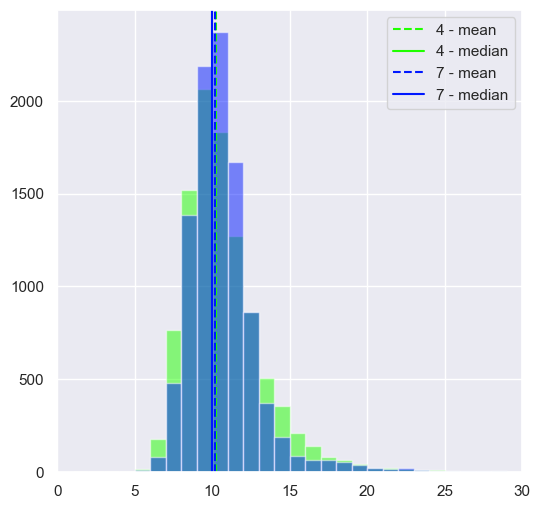

In [117]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list2:

    i = epsilon_list2.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [4,7]:
        # sns.kdeplot(np.array(data),color=color,alpha=0.5)
        # plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['4 - mean','4 - median','7 - mean','7 - median'])

#plt.legend([3,7])

## 4.0 Optimal Spot Point 

### 4.1 Extract Optimal Spot Point Handicap

In [5]:
df0 = df.loc[df.tokens==0].copy()
df0 = df0.loc[df0.remaining_throws==3].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e] 
    
    temp = df0.loc[df0.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


In [10]:
sp_handicap_vals = {}

for i in range(len(epsilon_list)):

    sp_handicap_vals[epsilon_list[i]] = {}

for i in range(len(epsilon_list)):

    stronger_no_token = epsilon_dfs[i][501] *3

    for j in range(len(epsilon_list)):

        #if j <= i:
        if epsilon_list[i] <= epsilon_list[j]: 

            df_j = epsilon_dfs[j] *3

            for s in range(3,502):

                x1 = s-1
                x2 = s 
                y1 = df_j[s-1] 
                y2 = df_j[s] 

                # print(f"\t {i}-{j}-{s}")
                # print(stronger_no_token,y1,y2)

                if (stronger_no_token >= y1) & (stronger_no_token <= y2):

                    handicap = linear_interpolation(x1,x2,y1,y2,stronger_no_token)

                    sp_handicap_vals[epsilon_list[i]][epsilon_list[j]] = handicap
                



### 4.2 Run Simulation

In [23]:
## Run Simulation 

# Initialize Parameters 

iterations = 1000

tokens1 = 0
tokens0 = 0

starting_score = 501

spot_points1=0
spot_points0=0

spot_darts1=0
spot_darts0=0

outcomes_sp = []


for epsilon1 in epsilon_list:
    
    for epsilon0 in epsilon_list:

        if epsilon1<=epsilon0:

            start_score_handicap = sp_handicap_vals[epsilon1][epsilon0]
            spot_points0 = starting_score - start_score_handicap
            spot_points0 = spot_points0.round()

            #print(epsilon1, epsilon0, start_score_handicap, spot_points0)

            i1 = epsilon_list.index(epsilon1)
            sim1 = sim_list[i1]
            sim1_paths = sim1.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens1, spot_darts=spot_darts1, spot_points=spot_points1)
            
            i0 = epsilon_list.index(epsilon0)
            sim0 = sim_list[i0]
            sim0_paths = sim0.run_simulation(iterations, starting_score=starting_score, starting_credits=tokens0, spot_darts=spot_darts0, spot_points=spot_points0)
        
            starter = 0 

            for iter in range(iterations):

                # get the number of turns needed to win 
                # need to explicilty count number of turns
                turn_path1 = [x for x in sim1_paths[iter] if x[2]==3]
                turn_path0 = [x for x in sim0_paths[iter] if x[2]==3]
                turns1 = len(turn_path1)
                turns0 = len(turn_path0)

                # declare the winner 
                if turns1 < turns0: 
                    winner = 1
                elif turns1 > turns0:
                    winner = 0
                elif turns1 == turns0:
                    winner = starter 
                
                # update starter so that they take turns
                if starter == 1:
                    starter = 0
                else:
                    starter =1 
                
                outcomes_sp.append([player_num,epsilon1,epsilon0,tokens1,tokens0,spot_points1,spot_points0,spot_darts1,spot_darts0,iter,winner])



Ran in 0.549s.
Ran in 0.499s.
Ran in 0.616s.
Ran in 0.499s.
Ran in 0.476s.
Ran in 0.435s.
Ran in 0.445s.
Ran in 0.457s.
Ran in 0.452s.
Ran in 0.440s.
Ran in 0.466s.
Ran in 0.424s.
Ran in 0.456s.
Ran in 0.422s.
Ran in 0.475s.
Ran in 0.412s.
Ran in 0.458s.
Ran in 0.406s.
Ran in 0.618s.
Ran in 0.599s.
Ran in 0.646s.
Ran in 0.656s.
Ran in 0.630s.
Ran in 0.680s.
Ran in 0.628s.
Ran in 0.608s.
Ran in 0.617s.
Ran in 0.612s.
Ran in 0.593s.
Ran in 0.594s.
Ran in 0.634s.
Ran in 0.567s.
Ran in 0.608s.
Ran in 0.566s.
Ran in 0.780s.
Ran in 0.752s.
Ran in 0.792s.
Ran in 0.769s.
Ran in 0.760s.
Ran in 0.731s.
Ran in 0.777s.
Ran in 0.724s.
Ran in 0.736s.
Ran in 0.703s.
Ran in 0.722s.
Ran in 0.692s.
Ran in 0.738s.
Ran in 0.675s.
Ran in 0.895s.
Ran in 0.885s.
Ran in 0.938s.
Ran in 0.867s.
Ran in 0.862s.
Ran in 0.851s.
Ran in 0.839s.
Ran in 0.819s.
Ran in 0.851s.
Ran in 0.839s.
Ran in 0.826s.
Ran in 0.824s.
Ran in 0.969s.
Ran in 0.954s.
Ran in 0.931s.
Ran in 0.940s.
Ran in 0.961s.
Ran in 0.983s.
Ran in 1.0

In [81]:
sim_paths = []
iterations = 1000

for epsilon in epsilon_list:

    start_score_handicap = sp_handicap_vals[1][epsilon] # stronger player is always 1
    spot_points = starting_score - start_score_handicap
    spot_points = spot_points.round()
    #spot_points = 0 

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    sim_paths.append(sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points))




Ran in 0.495s.
Ran in 0.473s.
Ran in 0.461s.
Ran in 0.495s.
Ran in 0.454s.
Ran in 0.451s.
Ran in 0.446s.
Ran in 0.443s.
Ran in 0.383s.


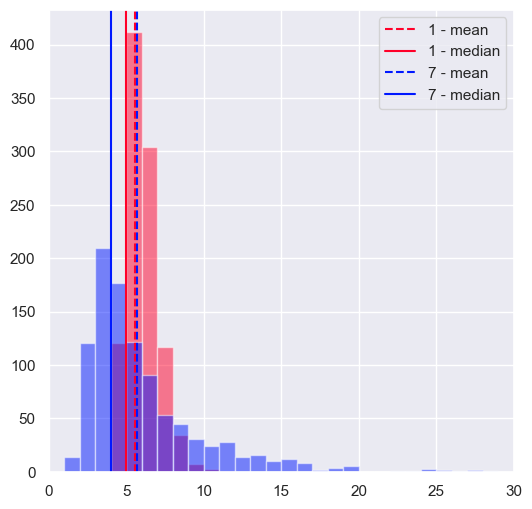

In [90]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [1,7]:
        #sns.kdeplot(np.array(data),color=color)
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['1 - mean','1 - median','7 - mean','7 - median'])

In [120]:
sim_paths = []
iterations = 1000

for epsilon in epsilon_list2:

    start_score_handicap = sp_handicap_vals[4][epsilon] # stronger player is always 1
    spot_points = starting_score - start_score_handicap
    spot_points = spot_points.round()
    #spot_points = 0 

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    sim_paths.append(sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=spot_points))




Ran in 0.842s.
Ran in 0.881s.
Ran in 0.853s.
Ran in 0.979s.
Ran in 0.912s.
Ran in 1.125s.


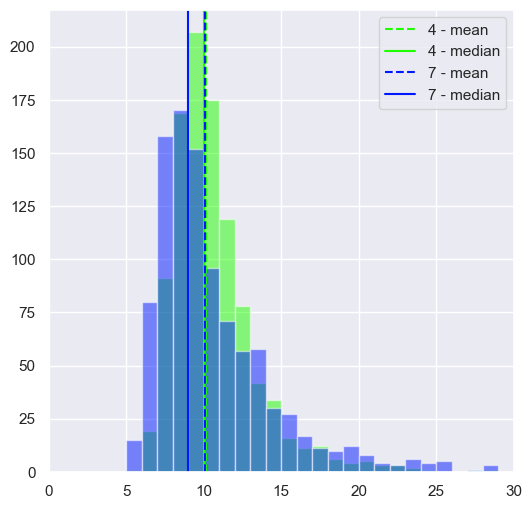

In [121]:
# With Spot Point Handicap
sim_lengths = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

for epsilon in epsilon_list2:

    i = epsilon_list2.index(epsilon)
    
    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [4,7]:
        #sns.kdeplot(np.array(data),color=color)
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['4 - mean','4 - median','7 - mean','7 - median'])

In [207]:
# With Spot Point Handicap
sim_lengths = []


for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)

    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    
    print("epsilon:",epsilon,"avg number of turns:", sum(data)/len(data))


epsilon: 1 avg number of turns: 5.5986
epsilon: 2 avg number of turns: 5.6282
epsilon: 3 avg number of turns: 5.6318
epsilon: 4 avg number of turns: 5.6135
epsilon: 5 avg number of turns: 5.5535
epsilon: 6 avg number of turns: 5.6964
epsilon: 7 avg number of turns: 5.6835
epsilon: 8 avg number of turns: 5.6576
epsilon: 9 avg number of turns: 5.5657


In [118]:
sim_paths = []
iterations = 1000

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)
    sim = sim_list[i]
    sim_paths.append(sim.run_simulation(iterations, starting_score=501, starting_credits=0, spot_darts=0, spot_points=0))


Ran in 0.457s.
Ran in 0.611s.
Ran in 0.751s.
Ran in 0.827s.
Ran in 0.933s.
Ran in 1.176s.
Ran in 1.134s.
Ran in 1.140s.
Ran in 1.229s.


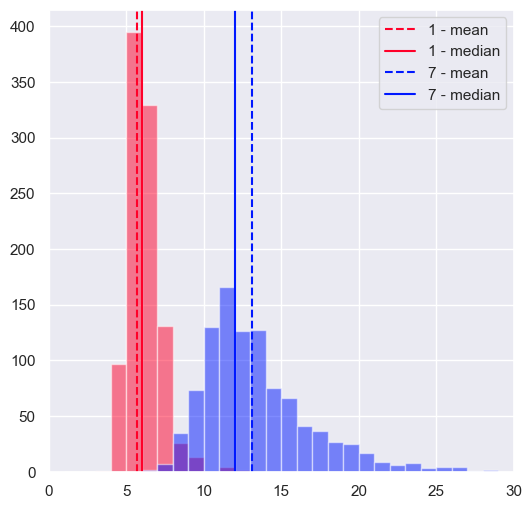

In [99]:
# Base Case - No Handicap 
sim_lengths = []

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)

    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [1,7]:
#         sns.kdeplot(np.array(data),color=color)
#         plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['1 - mean','1 - median','7 - mean','7 - median'])

# plt.legend([1,9])

#plt.legend(epsilon_list)

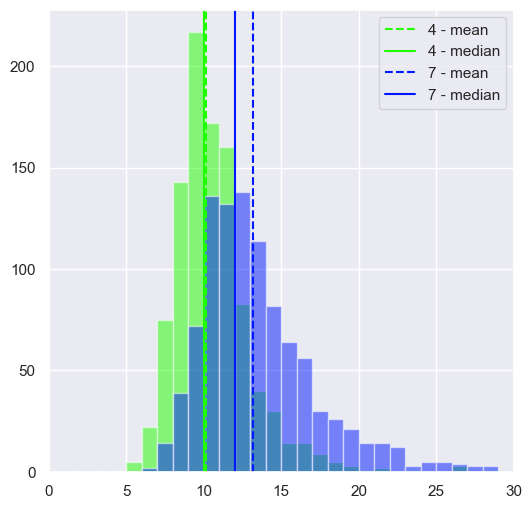

In [119]:
# Base Case - No Handicap 
sim_lengths = []

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)

    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [4,7]:
#         sns.kdeplot(np.array(data),color=color)
#         plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['4 - mean','4 - median','7 - mean','7 - median'])

# plt.legend([1,9])

#plt.legend(epsilon_list)

In [ ]:
# Base Case - No Handicap 
sim_lengths = []

for epsilon in epsilon_list:

    i = epsilon_list.index(epsilon)

    for iter in range(len(sim_paths[i])):
        sim_paths[i][iter] = [x for x in sim_paths[i][iter] if x[2]==3]

    data = [len(x) for x in sim_paths[i]]
    
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)

    if epsilon in [4,7]:
#         sns.kdeplot(np.array(data),color=color)
#         plt.xlim((0,30))
        plt.hist(np.array(data),color=color,alpha=0.5,bins=list(range(1,30)))
        plt.axvline(statistics.mean(data),color=color,linestyle='dashed')
        plt.axvline(statistics.median(data),color=color)
        plt.xlim((0,30))

plt.legend(['4 - mean','4 - median','7 - mean','7 - median'])

# plt.legend([1,9])

#plt.legend(epsilon_list)

In [26]:
col_names = ['player','epsilon_strong','epsilon_weak','tokens_strong','tokens_weak','spot_points_strong','spot_points_weak','spot_darts_strong','spot_darts_weak','game_id','winner_strong']
df_sp_results = pd.DataFrame(data=outcomes_sp,columns=col_names)

df_sp_results = df_sp_results.groupby(['epsilon_strong','epsilon_weak']).mean('winner_strong')['winner_strong'].reset_index()
df_sp_results = df_sp_results.round(2)


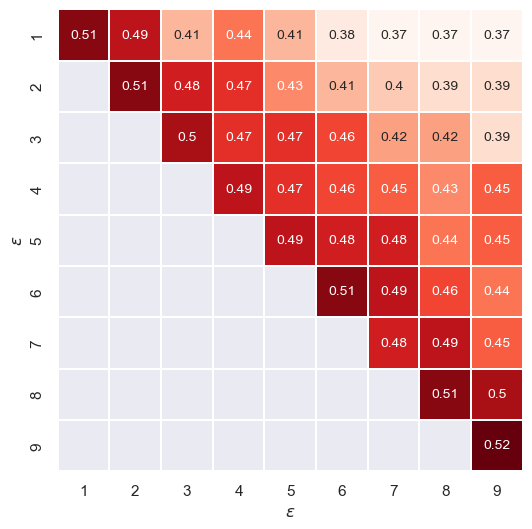

In [27]:
df_sp_results_graph = df_sp_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

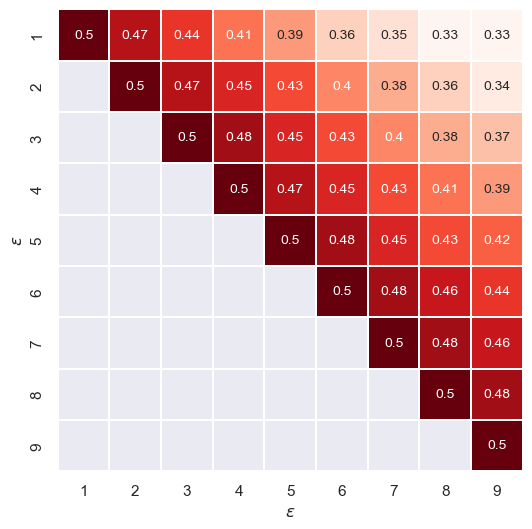

In [67]:
# DO NOT OVERWRITE
# 100,000 Iterations 

df_sp_results_graph = df_sp_results.pivot(columns='epsilon_weak',index='epsilon_strong',values='winner_strong')

fig = sns.set(rc={'figure.figsize':(6,6)})
fig = sns.heatmap(df_sp_results_graph,annot=True,annot_kws={"size": 10},fmt="",cmap='Reds',linewidths=0.30,cbar=False)
#fig = plt.title("Difference in expected throws using spot point handicap system")
fig = plt.xlabel(r'$\epsilon$')
fig = plt.ylabel(r'$\epsilon$')

In [122]:
import scipy.io
mat = scipy.io.loadmat('ALL_Model_Fits.mat')

In [124]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ModelFit_All_Doubles', 'ModelFit_B50', 'ModelFit_T17', 'ModelFit_T18', 'ModelFit_T19', 'ModelFit_T20', '__function_workspace__'])

In [138]:
mat['ModelFit_All_Doubles'].shape#[0,3]

(1, 16)